## A document clustering model with LDA+Kmean Hybrid model

### Brief Overview:
- Topic model extract different text content available in a particular document. for example: Suppose you are reading a blog about your friend’s last trip to Paris. So in different portion  of text you have he has described different event like transport, food, places to visit, expanse etc. but you are not interested about the entire text and you only want to know about the expanses. So, here topic model can help you to only expanse portion and provide you necessary content you want to read. 
- when you have 1000s of documents it is quite impossible to go throw all the documents and find out something. In this situation topic model help to figure which documents have the content you are looking for  but the problem here is you will only know if that particular document tells something about the topic you are looking for or not.
- Now let's think your requirements have been changed since last time and you want to find out other documents  too which describe the same topics because you want to read multiple people’s view to know what other people think about their Paris trip so that you can find a unbiased review about Paris trip and plan accordingly.
- Here if we will use the topic score as document features and design a clustering model then we can easily find out which documents are most similar w.r.t content. Now, someone can say only clustering can also do the similar job. Yes, Of course only clustering can do it but imagine abouts the feature dimension. suppose you have very long documents of about 200k words and you only have few documents like 2000. In this case we will have a very bad clustering model and we will not be able to generalize it to other dataset and also not be able  to guarantee about the performance to unknown future data. In this case a dimensionality reduction technique can solve our problem. As LDA(Latent Dirichlet Allocation) project the words of a document to topic dimensions we can use those projected dimensions as new features to build our clustering model.
** Below I have described in Detail**


 #### References
 - https://arxiv.org/ftp/arxiv/papers/1309/1309.6874.pdf
 - https://github.com/m-ochi/mglda/blob/master/mglda.py
 - https://github.com/AadityaNair/LDA-with-Deep-Learning  (Implementation of Latent Dirichlet Allocation using a Deep Learning Model)

In [364]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import nltk
import re
import os

from sklearn import decomposition
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
import statistics

In [365]:
df = pd.read_csv("regulation.csv")

In [17]:
text = df.content.values
print(text[1])
print("\n\nnumber of documents : ",len(text))

C.R.C., c. 1021 CANADA LANDS SURVEYS ACT Tariff of Fees to be Charged by the Department of Energy, Mines and Resources for Copies of Maps, Plans, Field Notes, or any Other Type of Record or  Document Arising from or Respecting Surveys Under the Canada Lands Surveys Act. Short Title. This Tariff may be cited as the  Lands Surveys Tariff . Establishment of Tariff. The fee set out in Column II of an item of the schedule is established as the fee to be charged by the Department of Energy, Mines and Resources for a copy of the record or document set out in Column I of that item. In addition to the fee established by subsection (1), a fee of $3.50 is to be charged by the Department of Energy, Mines and Resources for each order for copies of records or documents set out in Column I of the schedule. In addition to the fees established by subsections (1) and (2), a fee of $5 is to be charged by the Department of Energy, Mines and Resources for each certified true copy of a record or document se

In [4]:
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer

In [217]:
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer

# Function to convert 
#Penntreebank tags to wordnet tags
def getWordnetPos(treebank_tag):

    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:#We are igonring everything else other than four of the above 
         # tags. You can add more if you like
        return None 

#Custom function for toeknization
def myTokenizer(text):
    
    lemmatizer = WordNetLemmatizer()
    lemmas=[]
    
    for sent in nltk.sent_tokenize(text):
        #nltk return the tag from Penntreebank tagsets
        sentTag=nltk.pos_tag(nltk.word_tokenize(sent))
        sentTag=[(i.strip(),j) for i,j in sentTag if i.isalpha() and len(i)>2]
        #print (sentTag)
        for word, tag in sentTag:
            # the problem wordnet lemmatizer is that, it recognizes only
            # wordnet tags and not the PennTreebank tags. So we shall
            # first convert Penntreebank tags to Wordnet tags
            wordNetTag=getWordnetPos(tag)
            if wordNetTag is None:
                continue
            else:
                lemmas.append(lemmatizer.lemmatize(word,wordNetTag))
                
    return  lemmas
    
    
     
    
print("done")
# Stopswords
import nltk
import string
stopWords=nltk.corpus.stopwords.words('english')
stopWords+=["''", "'s", "...", "``","--","*","-"]
stopWords+=list(string.punctuation)
print("done")


done
done
['CUSTOMS', 'ACT', 'Tariff', 'Item', 'Nos', 'Accounting', 'Regulations', 'Whereas', 'propose', 'Tariff', 'Item', 'Nos', 'Accounting', 'Regulations', 'give', 'effect', 'part', 'public', 'announcement', 'make', 'October', 'be', 'therefore', 'virtue', 'paragraph', 'Customs', 'Act', 'not', 'require', 'publish', 'subsection', 'Act', 'Supp', 'Therefore', 'Excellency', 'Governor', 'General', 'Council', 'recommendation', 'Minister', 'National', 'Revenue', 'pursuant', 'subsection', 'paragraph', 'Customs', 'Act', 'hereby', 'make', 'annexed', 'Tariff', 'Item', 'Nos', 'Accounting', 'Regulations', 'Interpretation', 'Regulations', 'good', 'mean', 'good', 'tariff', 'item', 'List', 'Tariff', 'Provisions', 'set', 'out', 'schedule', 'Customs', 'Tariff', 'Accounting', 'Goods', 'importer', 'owner', 'good', 'person', 'authorize', 'account', 'good', 'paragraph', 'subsection', 'Customs', 'Act', 'accounting', 'good', 'section', 'Act', 'submit', 'invoice', 'write', 'statement', 'person', 'perform', '

In [240]:
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer(max_features=6000, max_df=1.0,
                       tokenizer=myTokenizer, stop_words=stopWords)
X = vect.fit_transform(text)

print (X.shape)
X.toarray()[0][:100]

(2062, 6000)


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 9, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [ ]:
x = [len( myTokenizer(i)) for i in text]

print("median :",statistics.median(x))
print("mean :",np.mean(x))
print("max :",max(x))
print("min :",min(x))

fig = plt.figure(figsize=(18,8))
ax = fig.add_axes([0,0,1,1])
x_ax= range(len(x))
y_ax = x
ax.bar(x_ax,y_ax,width=2)

plt.show()

plt.figure(figsize=(10,8))
plt.hist(x,bins=20)
plt.show()

In [277]:
from sklearn.decomposition import LatentDirichletAllocation

#Initialize LDA
vocabulary=X.shape[1] # total words in the training data
topics=50
alpha=(1/topics) #alpha for LDA
beta=(1/vocabulary)# beta for LDA

#Note alpha and beta in actual LDA algorithm are actually vectors of decimal values and not a single decimal value
# LDA implementation in Scikit does not take vectors as iput for alpha and beta. So, we have to assign one value for 
# them. This means we can't really control the skewness of topics' dsitribution or skeweness of words's distrbution
# and we just have to assign equal values to all in Scikit-learn. Another gensim library can help us solve this issue
# (see Exercises)

lda = LatentDirichletAllocation(n_components=topics, learning_method="batch",
max_iter=25, random_state=0, topic_word_prior=beta ,doc_topic_prior=alpha)


# Train it.
documentTopics = lda.fit_transform(X)

print ("Documents and topics shape: ", documentTopics.shape)
print("Topics and words shape: {}".format(lda.components_.shape))

Documents and topics shape:  (2062, 50)
Topics and words shape: (50, 6000)


    - Now we have 50 topics as 50 new projected features which I have furthure reduced to 3 dimensions for visualization purpose

[0.11762455 0.09539174 0.07722193]
[9.98807343 8.99472981 8.0928796 ]


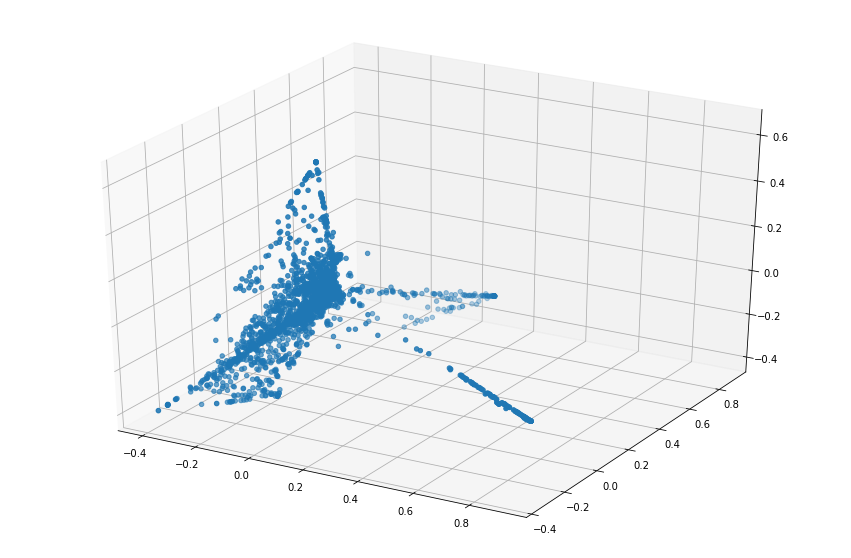

In [279]:
from sklearn.decomposition import PCA
pca = PCA(n_components= 3)
pca.fit(documentTopics)
X = pca.transform(documentTopics)

print(pca.explained_variance_ratio_)
print(pca.singular_values_)


import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

Y.shape

fig = plt.figure(figsize=(15,10))
ax = plt.axes(projection='3d')
ax.scatter(X[:,0], X[:,1], X[:,2], 'black')
plt.show()




In [280]:
len(vect.get_feature_names()) # 1000 words

6000

### This is how our topic words look like 

In [366]:
# Get the names of each word
feature_names=vect.get_feature_names()
topWords=-31 # 30 top words actually 11th is not printed
# Go through the topic-word matrix
for topicIdx, topic in enumerate(lda.components_):
    print ("Topic ",  topicIdx)
    #Get top n words
    print (",".join([feature_names[i]   for i in topic.argsort()[:topWords:-1]]))

Topic  0
act,subsection,regulation,section,force,canada,come,council,order,pursuant,minister,paragraph,governor,make,annexed,purpose,general,recommendation,hereby,excellency,day,schedule,canadian,register,respect,exemption,national,prescribe,authorize,apply
Topic  1
railway,company,line,power,transportation,construction,transport,storage,commission,unit,regulation,national,operation,service,station,use,plan,rail,locate,work,electricity,propose,application,site,operate,order,construct,canadian,ground,plant
Topic  2
order,producer,marketing,market,levy,mean,board,act,commodity,trade,province,interprovincial,export,plan,ontario,turkey,person,rich,pursuant,product,hog,produce,egg,saskatchewan,agricultural,manitoba,section,charge,quebec,time
Topic  3
establishment,person,blood,bond,donor,name,information,instrument,minister,date,section,bank,regulation,carrier,report,notice,record,use,air,birth,following,human,issue,owner,investigation,applicable,year,mean,subsection,passenger
Topic  4
comp

In [282]:
# 1st document topic propertion
print(np.round(documentTopics[10,:],2).sum())  # probability distribution of topic to document
documentTopics[1999].argsort()[::-1]

0.98


array([19,  0, 11, 18,  2,  3, 22, 21, 20,  1, 17, 16, 15, 14, 13, 12, 48,
       10,  9,  8,  7,  6,  5,  4, 23, 49, 25, 26, 47, 46, 45, 44, 43, 42,
       41, 40, 39, 38, 37, 36, 35, 34, 33, 32, 31, 30, 29, 28, 27, 24],
      dtype=int64)

In [283]:
ind = documentTopics[1999].argsort()[::-1]
print([round(documentTopics[1999][i],2) for i in ind])
ind

[0.68, 0.23, 0.06, 0.02, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


array([19,  0, 11, 18,  2,  3, 22, 21, 20,  1, 17, 16, 15, 14, 13, 12, 48,
       10,  9,  8,  7,  6,  5,  4, 23, 49, 25, 26, 47, 46, 45, 44, 43, 42,
       41, 40, 39, 38, 37, 36, 35, 34, 33, 32, 31, 30, 29, 28, 27, 24],
      dtype=int64)

#### Kmean clustering for grouping similar documents 

In [367]:
from sklearn.cluster import KMeans



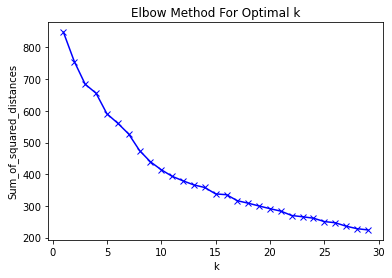

In [368]:
Sum_of_squared_distances = []
K = range(1,30)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(documentTopics)
    Sum_of_squared_distances.append(km.inertia_)
    
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [331]:
kmeans = KMeans(n_clusters=13, random_state=0).fit(documentTopics)
Y = kmeans.labels_

[0.11762455 0.09539174]
[9.98807343 8.9947298 ]


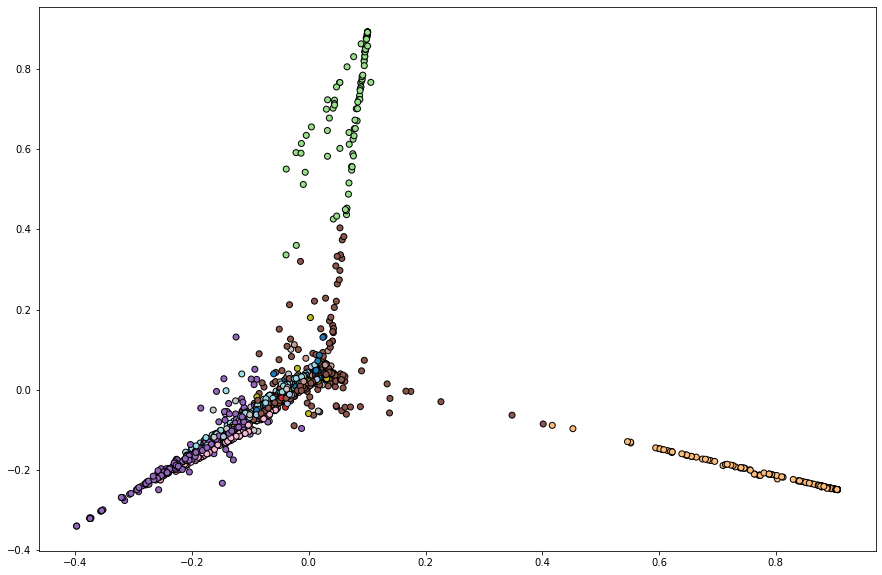

In [333]:
from sklearn.decomposition import PCA
pca = PCA(n_components= 2)
pca.fit(documentTopics)
doc_topic = pca.transform(documentTopics)

print(pca.explained_variance_ratio_)
print(pca.singular_values_)


import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


fig = plt.figure(figsize=(15,10))
plt.scatter(doc_topic[:, 0], doc_topic[:, 1], c=Y,cmap = "tab20", edgecolor='k')
plt.show()



- Here we can see how our hybrid model has grouped documents. I have shown an example below. The cluster two most probably say about regulations related to Airport

In [334]:

df['response'] = Y
dff = df.sort_values('response')

In [370]:
dff[dff['response'] == 3]['longtitle'].values

array(['Order Granting Authority to Regulate the Marketing in Interprovincial and Export Trade of Fresh Potatoes Produced in Ontario',
       'Order Respecting the Fixing and Imposing of Levies on, and the Collecting of Levies From, Producers of Wood in the Labelle Area in the Province of Quebec, With Respect to the Marketing of Wood in Interprovincial and Export Trade',
       'Order Granting Authority to Regulate the Marketing in Interprovincial and Export Trade of Wheat Produced in Nova Scotia',
       'New Brunswick Primary Forest Products Order',
       'Order Providing for the Fixing and Imposing of Levies on Pulse Crops Produced in Saskatchewan and Marketed in Interprovincial and Export Trade',
       'Order Providing for the Fixing, Imposing and Collecting of Levies Payable for the Marketing, in Interprovincial and Export Trade, of Milk and Cream Produced in Manitoba',
       'Order Providing for the Fixing, Imposing and Collecting of Levies from Certain Persons who are Engaged